In [10]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ] # if 'Mal' in font.name 
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_prop)


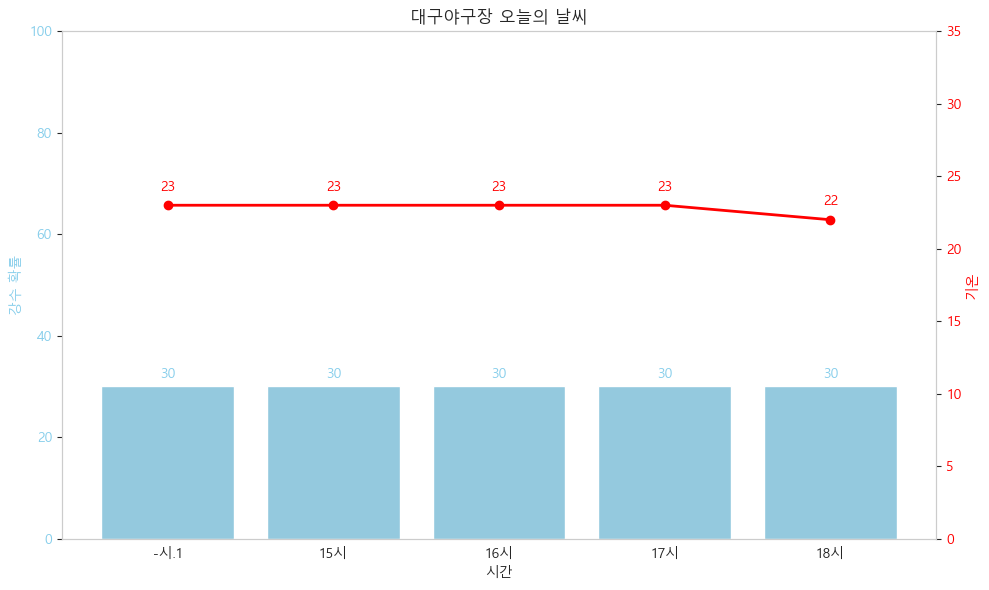

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 한글 폰트 설정
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_prop)

stadium_name = '대구야구장'
# CSV 불러오기
weather_stadium_df = pd.read_csv('weather_stadium_data.csv')
weather_input_df = weather_stadium_df[weather_stadium_df['stadium'] == stadium_name]

# x축 (문자열로 변환)
x = list(map(str, weather_input_df.columns[1:]))

# y1, y2 숫자 변환 + NaN 처리
y1 = pd.to_numeric(weather_input_df.iloc[0, 1:], errors='coerce')
y2 = pd.to_numeric(weather_input_df.iloc[1, 1:], errors='coerce')
valid_idx = ~(y1.isna() | y2.isna())

x_valid = [x[i] for i in range(len(x)) if valid_idx.iloc[i]]
y1_valid = y1[valid_idx].values
y2_valid = y2[valid_idx].values

df_plot = pd.DataFrame({
    '시간': x_valid,
    '값': y1_valid
})

# 스타일
sns.set_palette("pastel")

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 강수 확률 막대 그래프
bars = sns.barplot(data=df_plot, x='시간', y='값', color='skyblue', ax=ax1)
ax1.set_ylabel('강수 확률', color='skyblue')
ax1.set_ylim(0, 100)
ax1.tick_params(axis='y', labelcolor='skyblue')

for bar in bars.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}', 
             ha='center', va='bottom', fontsize=10, color='skyblue')

# 기온 꺾은선 그래프
ax2 = ax1.twinx()
ax2.plot(x_valid, y2_valid, marker='o', color='red', label='기온', linewidth=2)

for i, val in enumerate(y2_valid):
    ax2.text(i, val + 0.8, f'{val:.0f}', ha='center', va='bottom', fontsize=10, color='red')

ax2.set_ylabel('기온', color='red')
ax2.set_ylim(0, 35)
ax2.tick_params(axis='y', labelcolor='red')

# 제목
plt.title(f'{stadium_name} 오늘의 날씨')

# axes 선 제거 (양쪽)
for spine in ['top', 'right', 'left', 'bottom']:
    # ax1.spines[spine].set_visible(False)
    # ax2.spines[spine].set_visible(False)
    ax1.grid(False)
    ax2.grid(False)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 한글 폰트 설정
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_prop)

areaName1 = '대구광역시'
# CSV 불러오기
areas_weather_today_df = pd.read_csv('areas_weather_today.csv')
area_weather_today_df = areas_weather_today_df[areas_weather_today_df['areaName1'] == areaName1] # 특정 야구장 날씨만 가져오기

# x축 time
time_list = area_weather_today_df['time'].iloc[0]
rainProb_list = area_weather_today_df['rainProb'].iloc[0]
temp_list = area_weather_today_df['temp'].iloc[0]

# # y1, y2 숫자 변환 + NaN 처리
# y1 = pd.to_numeric(weather_input_df.iloc[0, 1:], errors='coerce')
# y2 = pd.to_numeric(weather_input_df.iloc[1, 1:], errors='coerce')
# valid_idx = ~(y1.isna() | y2.isna())

# x_valid = [x[i] for i in range(len(x)) if valid_idx.iloc[i]]
# y1_valid = y1[valid_idx].values
# y2_valid = y2[valid_idx].values

# df_plot = pd.DataFrame({
#     '시간': x_valid,
#     '값': y1_valid
# })

# # 스타일
# sns.set_palette("pastel")

# # 그래프 생성
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # 강수 확률 막대 그래프
# bars = sns.barplot(data=df_plot, x='시간', y='값', color='skyblue', ax=ax1)
# ax1.set_ylabel('강수 확률', color='skyblue')
# ax1.set_ylim(0, 100)
# ax1.tick_params(axis='y', labelcolor='skyblue')

# for bar in bars.patches:
#     height = bar.get_height()
#     ax1.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}', 
#              ha='center', va='bottom', fontsize=10, color='skyblue')

# # 기온 꺾은선 그래프
# ax2 = ax1.twinx()
# ax2.plot(x_valid, y2_valid, marker='o', color='red', label='기온', linewidth=2)

# for i, val in enumerate(y2_valid):
#     ax2.text(i, val + 0.8, f'{val:.0f}', ha='center', va='bottom', fontsize=10, color='red')

# ax2.set_ylabel('기온', color='red')
# ax2.set_ylim(0, 35)
# ax2.tick_params(axis='y', labelcolor='red')

# # 제목
# plt.title(f'{stadium_name} 오늘의 날씨')

# # axes 선 제거 (양쪽)
# for spine in ['top', 'right', 'left', 'bottom']:
#     # ax1.spines[spine].set_visible(False)
#     # ax2.spines[spine].set_visible(False)
#     ax1.grid(False)
#     ax2.grid(False)

# # 레이아웃 조정 및 출력
# plt.tight_layout()
# plt.show()


[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
